In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-mine-dataset/sonar data.csv


In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [105]:
df = pd.read_csv("/kaggle/input/sonar-mine-dataset/sonar data.csv",header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [106]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [108]:
df.duplicated().sum()

0

<Axes: ylabel='count'>

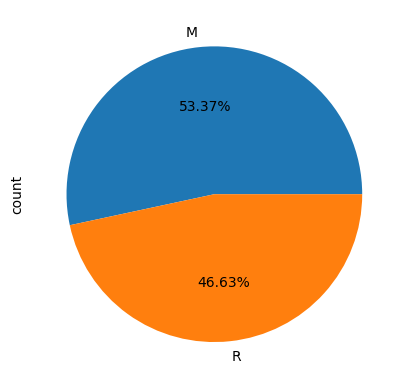

In [109]:
df[60].value_counts().plot.pie(autopct='%.2f%%')

In [110]:
df[60] = pd.factorize(df[60])[0]

In [111]:
df.shape

(208, 61)

In [112]:
x = df.drop(60, axis=1)
y = df[60]

print(x.shape)
print(y.shape)

(208, 60)
(208,)


In [113]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [114]:
model = models.Sequential()
model.add(layers.Dense(60, input_dim = 60, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(60, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(60, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(60, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [115]:
dd  = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])



In [116]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 60)                3660      
                                                                 
 dropout_40 (Dropout)        (None, 60)                0         
                                                                 
 dense_51 (Dense)            (None, 60)                3660      
                                                                 
 dropout_41 (Dropout)        (None, 60)                0         
                                                                 
 dense_52 (Dense)            (None, 60)                3660      
                                                                 
 dropout_42 (Dropout)        (None, 60)                0         
                                                                 
 dense_53 (Dense)            (None, 60)              

In [117]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy'])
comp = model.fit(x_train, y_train,epochs=80,batch_size=32,validation_data=(x_test, y_test))

Epoch 1/80
6/6 [==============================] - 2s 52ms/step - loss: 0.7011 - accuracy: 0.4880 - val_loss: 0.6976 - val_accuracy: 0.4048
Epoch 2/80
6/6 [==============================] - 0s 12ms/step - loss: 0.7014 - accuracy: 0.5241 - val_loss: 0.7022 - val_accuracy: 0.4048
Epoch 3/80
6/6 [==============================] - 0s 9ms/step - loss: 0.7058 - accuracy: 0.4759 - val_loss: 0.6884 - val_accuracy: 0.6190
Epoch 4/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6804 - accuracy: 0.5361 - val_loss: 0.6771 - val_accuracy: 0.7381
Epoch 5/80
6/6 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.5422 - val_loss: 0.6727 - val_accuracy: 0.6667
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 0.6882 - accuracy: 0.5241 - val_loss: 0.6713 - val_accuracy: 0.7143
Epoch 7/80
6/6 [==============================] - 0s 12ms/step - loss: 0.6896 - accuracy: 0.5361 - val_loss: 0.6677 - val_accuracy: 0.7381
Epoch 8/80
6/6 [==============

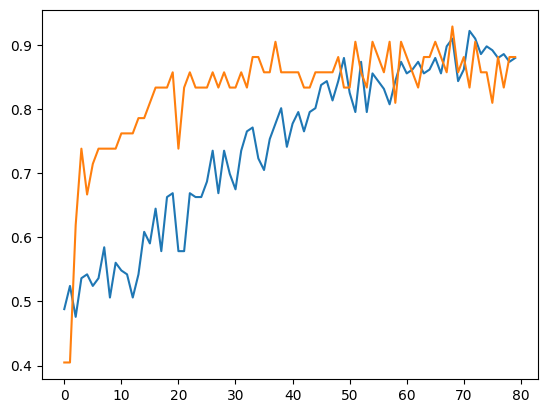

In [118]:
import matplotlib.pyplot as plt

plt.subplot()
plt.plot(comp.history['accuracy'])
plt.plot(comp.history['val_accuracy'])

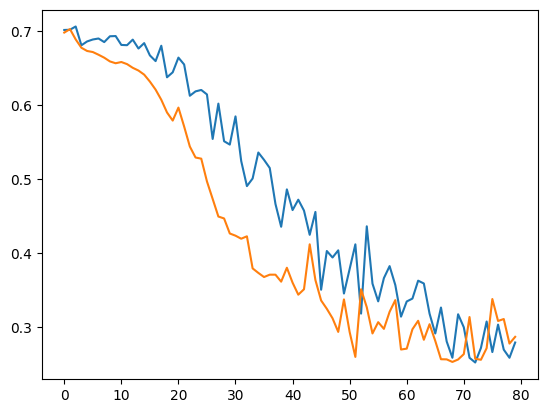

In [119]:
plt.subplot()
plt.plot(comp.history['loss'])
plt.plot(comp.history['val_loss'])

In [120]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.8810


[0.2868868410587311, 0.8809523582458496]